In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
orders_df = pd.read_csv('orders.csv', dtype = 
                        {'order_id' : np.int32, 'user_id' : np.int32,
                        'eval_set' : 'category',
                        'order_number' : np.int16,
                        'order_dow' : np.int8,
                        'order_hour_of_day' : np.int8,
                        'days_since_prior_order' : np.float32})

products = pd.read_csv('products.csv', dtype={
        'product_id': np.uint16,
        'order_id': np.int32,
        'aisle_id': np.uint8,
        'department_id': np.uint8})

print('loading prior')
priors = pd.read_csv('order_products__prior.csv', dtype={
            'order_id': np.int32,
            'product_id': np.uint16,
            'add_to_cart_order': np.int16,
            'reordered': np.int8})

print('loading train')
train = pd.read_csv('order_products__train.csv', dtype={
            'order_id': np.int32,
            'product_id': np.uint16,
            'add_to_cart_order': np.int16,
            'reordered': np.int8})

print ('loading')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')

loading prior
loading train
loading


In [3]:
orders = orders_df[orders_df['eval_set']=='prior']

In [50]:
priors

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [4]:
df = pd.merge(orders, priors, on = 'order_id')

In [5]:
df.drop('eval_set', axis = 1, inplace = True)

In [6]:
df_one = pd.merge(df, products, on ='product_id')

In [7]:
df_one

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7


In [8]:
df_u = pd.DataFrame()

# 물건을 주문하는 기간 사이의 텀과, 총 물건 주문 갯수 간의 관계가 있을까?
    - 주문텀이 7일 이고 총 14개의 물건을 구매
    - 주문텀이 3일이고 총 7개의 물건을 구매 이런식으로.

In [55]:
dd_one_exe = df_one.groupby(['user_id', 'order_id'])['days_since_prior_order'].value_counts().to_frame()

In [67]:
# df1.rename(columns={'B': 'BB'})
# 멀티 인덱스에서 칼럼 이름을 바꾸는 방법

In [66]:
dd_one_exe.rename(columns = {'days_since_prior_order' : 'cnt'}, inplace = True)

In [72]:
dd_one_exe.reset_index(inplace = True)

In [86]:
dd_one_exe[dd_one_exe['cnt'] == 145]

,index,user_id,order_id,days_since_prior_order,cnt
334832,334832,22906,1564244,30.0,145


In [77]:
dd_one_two = dd_one_exe.groupby('days_since_prior_order')['cnt'].mean().round(2).to_frame()

In [80]:
dd_one_two.reset_index(inplace = True)

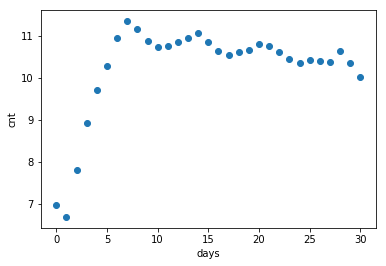

In [84]:
plt.scatter(dd_one_two['days_since_prior_order'], dd_one_two['cnt'])
plt.xlabel('days')
plt.ylabel('cnt')

# 텀이 길 수록 많은 물건을 살 것이라 생각 했지만 생각보다 눈에 띄는 것은 없다

# 다만 중간중간에 뾰족 튀어나오는 애들은 무엇인가 라는 생각

# 하지만 days 대비 토탈의 평균을 나눈셈이라... 정확도는 장담못함


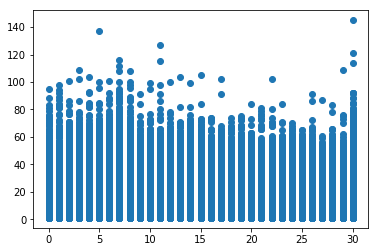

In [73]:
plt.scatter(dd_one_exe['days_since_prior_order'], dd_one_exe['cnt'])

# 상품 전체 분석

In [9]:
dd_one = df_one.groupby('product_name').size().to_frame()
# 상품별 총 구매 횟수

In [10]:
dd_two = df_one.groupby('product_name')['reordered'].sum().to_frame()
# 상품별 재 구매된 횟수

In [11]:
dd_one.reset_index(inplace = True)

In [12]:
dd_one.head()

,product_name,0
0,#2 Coffee Filters,777
1,#2 Cone White Coffee Filters,13
2,#2 Mechanical Pencils,8
3,#4 Natural Brown Coffee Filters,241
4,& Go! Hazelnut Spread + Pretzel Sticks,164


In [13]:
dd_two.reset_index(inplace = True)

In [14]:
dd_two['total_cnt'] = dd_one[0]

In [15]:
dd_two['ratio'] = (dd_two.reordered / dd_two.total_cnt).round(1)

In [16]:
dd_two.head(10)

,product_name,reordered,total_cnt,ratio
0,#2 Coffee Filters,257.0,777,0.3
1,#2 Cone White Coffee Filters,3.0,13,0.2
2,#2 Mechanical Pencils,0.0,8,0.0
3,#4 Natural Brown Coffee Filters,89.0,241,0.4
4,& Go! Hazelnut Spread + Pretzel Sticks,87.0,164,0.5
5,'Swingtop' Premium Lager,0.0,1,0.0
6,(70% Juice!) Mountain Raspberry Juice Squeeze,16.0,28,0.6
7,+Energy Black Cherry Vegetable & Fruit Juice,11.0,29,0.4
8,".5\"" Waterproof Tape",0.0,8,0.0
9,0 Calorie Acai Raspberry Water Beverage,63.0,96,0.7


In [17]:
dd_two[dd_two['ratio'] > 0.7][['product_name', 'total_cnt']].head()

,product_name,total_cnt
10,0 Calorie Fuji Apple Pear Water Beverage,185
11,0 Calorie Strawberry Dragonfruit Water Beverage,239
22,0% Greek Strained Yogurt,13238
46,1% Low Fat Milk,8621
50,1% Lowfat Milk,14231


- 이상 제품의 총 구매 횟수와 재구매, 그리고 그 비율을 구하였다.

# 유저별 상품 분석

In [18]:
dd = pd.DataFrame(df_one.groupby(['user_id', 'product_name'])['reordered'].sum())

In [19]:
dd_one = df_one.groupby(['user_id','product_name']).size().to_frame()
# 유저별 상품 뭐 삿는지.

In [20]:
dd_one.reset_index(inplace = True)

In [21]:
dd.reset_index(inplace = True)

In [22]:
dd_one['reordered'] = dd['reordered']

In [23]:
dd_one['ratio'] = (dd_one['reordered'] / dd_one[0]).round(1)

In [24]:
dd_one.head(20)
# 유저별 구매 상품의 총 횟수(갯수) 와 재구매 횟수, 그리고 재구매 비율.

,user_id,product_name,0,reordered,ratio
0,1,0% Greek Strained Yogurt,1,0,0.0
1,1,Aged White Cheddar Popcorn,2,1,0.5
2,1,Bag of Organic Bananas,2,1,0.5
3,1,Bartlett Pears,1,0,0.0
4,1,Cinnamon Toast Crunch,3,2,0.7
5,1,Creamy Almond Butter,1,0,0.0
6,1,Honeycrisp Apples,1,0,0.0
7,1,Milk Chocolate Almonds,1,0,0.0
8,1,Organic Fuji Apples,1,0,0.0
9,1,Organic Half & Half,2,1,0.5


# 재구매 비율이 높은 상품은 몇번째 순서에 구매가 될까?

In [102]:
dd_one_exe = df_one.groupby(['user_id', 'product_name'])['add_to_cart_order'].mean().round(2).to_frame()
# 유저아이디, 상품 이름 을 기준으로 카트에 싣는 순서의 평균을 구함.

In [103]:
dd_one_exe

add_to_cart_order
user_id product_name                                                         
1       0% Greek Strained Yogurt                                         4.00
        Aged White Cheddar Popcorn                                       4.50
        Bag of Organic Bananas                                           6.00
        Bartlett Pears                                                   7.00
        Cinnamon Toast Crunch                                            6.33
        Creamy Almond Butter                                             5.00
        Honeycrisp Apples                                                6.00
        Milk Chocolate Almonds                                           3.00
        Organic Fuji Apples                                              5.00
        Organic Half & Half                                              3.50
        Organic String Cheese                                            4.00
        Organic Unsweetened Almond Milk                                  7.00
        Organic Unsweetened Vanilla Almond Milk                          2.00
        Original Beef Jerky                                              3.30
        Pistachios                                                       3.33
        Soda                                                             1.40
        XL Pick-A-Size Paper Towel Rolls                                 5.00
        Zero Calorie Cola                                                3.00
2       100% Mighty Mango Juice Smoothie                                 7.00
        All Natural Honey Almond Butter                                 15.00
        Apple Cinnamon Fig Bar                                           7.00
        Artichoke Spinach Dip                                            1.00
        Bag of Organic Bananas                                          12.00
        Baked Organic Sea Salt Crunchy Pea Snack                         2.60
        Banana                                                           4.29
        Bartlett Pears                                                  16.00
        Black Plum                                                      10.00
        Blueberry Yoghurt                                                9.50
        Broccoli & Cheddar Bake Meal Bowl                               23.00
        Brown Rice Black-Eyed Peas and Veggies Bowl                     26.00
...                                                                       ...
206209  Mini Babybel Light Semisoft Edam Cheeses                         8.33
        Natural Free & Clear Dish Liquid                                10.00
        Organic 1% Low Fat Milk                                         10.00
        Organic Diced Tomatoes                                           8.00
        Organic Mexican Blend Finely Shredded Cheese                     5.00
        Organic Peeled Whole Baby Carrots                                8.00
        Organic Raw Unfiltered Apple Cider Vinegar                      10.00
        Original High Efficiency Liquid Laundry Detergent               10.67
        Original Multigrain Spoonfuls Cereal                             4.00
        Oven Roasted Turkey Breast                                       7.00
        Pure Coconut Milk                                               11.00
        Quick 1 Minute Oatmeal                                           4.00
        Quick 1 Minute Whole Grain Oats                                  9.00
        Raisin Bran Cereal                                               4.00
        Raisins                                                          5.00
        Rice Krispies Cereal                                             9.00
        Roasted & Salted Shelled Pistachios                              9.00
        Sea Salt Flakes Original                                         9.00
        Sensitive Toilet Paper                                           8.00
    

In [95]:
dd_one_exe.reset_index(inplace = True)

In [96]:
dd_one['add_mean'] = dd_one_exe['add_to_cart_order']

In [98]:
dd_one.head()

,user_id,product_name,0,reordered,ratio,add_mean
0,1,0% Greek Strained Yogurt,1,0,0.0,4.00
1,1,Aged White Cheddar Popcorn,2,1,0.5,4.50
2,1,Bag of Organic Bananas,2,1,0.5,6.00
3,1,Bartlett Pears,1,0,0.0,7.00
4,1,Cinnamon Toast Crunch,3,2,0.7,6.33


# 재 구매 비율이 높은 상품은 오더순서도 빠를 것이다.
- 즉 비율과 순서는 서로 반비례일 것이다.

In [51]:
dd_one_exe = dd_one[dd_one['reordered'] != 0]
# 재구매가 이루어진 상품만 뽑아냄

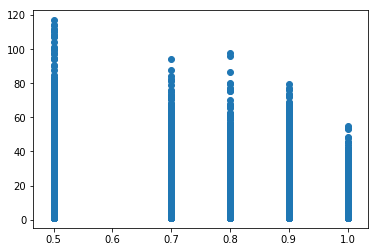

In [48]:
plt.scatter(dd_one_exe['ratio'], dd_one_exe['add_mean'])

In [90]:
dd_three = dd_one.groupby('ratio')['add_mean'].mean().to_frame()

In [92]:
dd_three.reset_index(inplace = True)

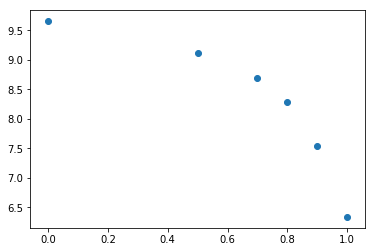

In [93]:
plt.scatter(dd_three['ratio'], dd_three['add_mean'])

# 음.. 아닌거 같은데?

# 평균으로 구간을 끊어서 계산 했기 때문에 정보의 손실이 크다(비약이 심함)

In [30]:
dd_one[dd_one['ratio'] > 0.7]['product_name'].value_counts()

Banana                                                                               34903
Bag of Organic Bananas                                                               27865
Organic Strawberries                                                                 20948
Organic Baby Spinach                                                                 19939
Organic Hass Avocado                                                                 16760
Organic Avocado                                                                      14038
Large Lemon                                                                          12489
Strawberries                                                                         11432
Limes                                                                                11114
Organic Raspberries                                                                  10605
Organic Whole Milk                                                                    9588

# 개별 칼럼에 대한 분석

In [31]:
df_one['product_name'].value_counts()
# 전체 판매 중 가장 많이 팔린 애들.

Banana                                             472565
Bag of Organic Bananas                             379450
Organic Strawberries                               264683
Organic Baby Spinach                               241921
Organic Hass Avocado                               213584
Organic Avocado                                    176815
Large Lemon                                        152657
Strawberries                                       142951
Limes                                              140627
Organic Whole Milk                                 137905
Organic Raspberries                                137057
Organic Yellow Onion                               113426
Organic Garlic                                     109778
Organic Zucchini                                   104823
Organic Blueberries                                100060
Cucumber Kirby                                      97315
Organic Fuji Apple                                  89632
Organic Lemon 

In [32]:
df_one.groupby('add_to_cart_order')['aisle_id'].value_counts()
# add_cart_order 순서대로의 중분규 값.
# [0] 으로 인덱싱 주면 445731 이 들어옴.

add_to_cart_order  aisle_id
1                  24          445731
                   83          237946
                   84          189435
                   115         160575
                   123         142252
                   120         134394
                   91           94175
                   31           73986
                   21           66994
                   112          63510
                   86           62561
                   77           62060
                   107          54590
                   32           51062
                   37           50165
                   53           44255
                   98           38268
                   116          35675
                   17           32589
                   78           31796
                   121          30393
                   96           30375
                   3            30076
                   26           29878
                   54           29187
                   67 

In [33]:
df_one_exe = df_one[:100000]

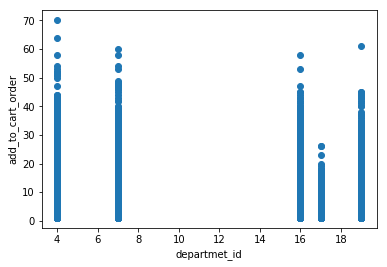

In [34]:
plt.scatter(df_one_exe['department_id'], df_one_exe['add_to_cart_order'])
plt.xlabel('departmet_id')
plt.ylabel('add_to_cart_order')

In [35]:
df_one.groupby('aisle_id')['reordered'].size()
# 중분류별 구매 총 횟수.

aisle_id
1        71928
2        82491
3       456386
4       200687
5        62510
6        36291
7        33865
8        34871
9       218387
10        9172
11       26061
12       36727
13       99032
14      129474
15       20931
16      377741
17      326692
18       17368
19      245466
20       63749
21      979763
22       32013
23      163524
24     3642188
25       64059
26      207075
27       48657
28       35181
29       66926
30       74947
        ...   
105     106089
106     305655
107     722470
108     308007
109      10164
110     112639
111      43348
112     584834
113       4853
114     118477
115     841533
116     522654
117     306487
118      10872
119      19319
120    1452343
121     377586
122      70887
123    1765313
124      28102
125      35590
126      19753
127      40768
128     193297
129     194582
130     158164
131     266637
132       6168
133      18683
134      11198
Name: reordered, Length: 134, dtype: int64

In [36]:
df_one.groupby('aisle_id')['reordered'].sum()
# 중분류별 재오더 된 횟수.

aisle_id
1        42912.0
2        40365.0
3       272922.0
4        98243.0
5        17542.0
6        14806.0
7        18394.0
8        17405.0
9       104597.0
10        1792.0
11        6156.0
12       18513.0
13       61376.0
14       78691.0
15       10620.0
16      195230.0
17       99668.0
18       10775.0
19       86120.0
20       20486.0
21      573383.0
22        7870.0
23       96804.0
24     2615469.0
25       20430.0
26      128330.0
27       27506.0
28       19305.0
29       24030.0
30       29787.0
         ...    
105      41669.0
106     170005.0
107     425387.0
108     174047.0
109       2460.0
110      50448.0
111      19177.0
112     391937.0
113       2188.0
114      34185.0
115     613977.0
116     283033.0
117     159119.0
118       2118.0
119       8129.0
120     997018.0
121     215822.0
122      37786.0
123    1127177.0
124      16084.0
125      22074.0
126       6337.0
127      13428.0
128     106546.0
129     102264.0
130      79003.0
131     120803.0
132  

In [37]:
df_one.groupby(['user_id', 'order_id'])['department_id'].value_counts()
# 유저-오더 아이디별 대분류 갯수.

user_id  order_id  department_id
1        431534    4                4
                   19               2
                   7                1
                   16               1
         473747    19               2
                   7                1
                   13               1
                   16               1
         550135    19               2
                   7                1
                   14               1
                   16               1
         2254736   19               2
                   7                1
                   16               1
                   17               1
         2295261   7                2
                   16               2
                   19               2
         2398795   19               3
                   4                1
                   7                1
                   14               1
         2539329   19               2
                   7                1
                 

In [38]:
df_one.groupby(['user_id', 'order_id'])['aisle_id'].value_counts()
# 유저-오더아이디별 중분류 갯수.

user_id  order_id  aisle_id
1        431534    24          4
                   21          1
                   23          1
                   77          1
                   117         1
         473747    21          1
                   23          1
                   77          1
                   88          1
                   117         1
         550135    21          1
                   23          1
                   77          1
                   117         1
                   121         1
         2254736   21          1
                   23          1
                   54          1
                   77          1
                   117         1
         2295261   77          2
                   21          1
                   23          1
                   53          1
                   117         1
         2398795   23          2
                   24          1
                   77          1
                   117         1
               

In [39]:
df_one.groupby(['user_id', 'order_id']).size()
# user-order_id 별 구매한 갯수.

user_id  order_id
1        431534       8
         473747       5
         550135       5
         2254736      5
         2295261      6
         2398795      6
         2539329      5
         2550362      9
         3108588      6
         3367565      4
2        738281      13
         788338      16
         839880      16
         1199898     21
         1402090     15
         1447487      9
         1501582      6
         1673511     13
         1718559     26
         1901567      5
         2168274     13
         3186735     19
         3194192     14
         3268552      9
3        444309       9
         521107       5
         676467       6
         1374495     10
         1402502      6
         1839752      9
                     ..
206208   2675140      9
         2789700     16
         2804556     16
         2808240      8
         2922221      8
         2936891     11
         2995770     21
         3027766     11
         3038194     18
         3049681     1

In [40]:
df_one.groupby(['user_id', 'order_id'])['order_hour_of_day'].mean()
# user-order_id 별 하루에 구매 평균 시간.

user_id  order_id
1        431534      15
         473747      12
         550135       9
         2254736      7
         2295261     16
         2398795      7
         2539329      8
         2550362      8
         3108588     14
         3367565      7
2        738281      10
         788338      15
         839880      10
         1199898      9
         1402090     10
         1447487     11
         1501582     10
         1673511     11
         1718559      9
         1901567     10
         2168274     11
         3186735      9
         3194192     12
         3268552     11
3        444309      19
         521107      18
         676467      16
         1374495     14
         1402502     15
         1839752     15
                     ..
206208   2675140     19
         2789700     22
         2804556     15
         2808240     15
         2922221     12
         2936891     10
         2995770     14
         3027766     14
         3038194     17
         3049681     1

In [41]:
df_one.groupby('user_id')['order_dow'].mean()
# 유저별 order_dow 의 평균이 맞는지??

user_id
1         2.644068
2         2.005128
3         1.011364
4         4.722222
5         1.621622
6         3.857143
7         1.728155
8         4.204082
9         2.697368
10        4.013986
11        4.308511
12        3.108108
13        3.098765
14        4.076190
15        2.472222
16        2.042857
17        3.316327
18        2.589744
19        4.901961
20        2.000000
21        2.029268
22        3.753623
23        3.275000
24        2.894737
25        2.142857
26        3.392857
27        2.579427
28        1.590164
29        3.520000
30        1.181818
            ...   
206180    1.502924
206181    3.834646
206182    1.458333
206183    4.165829
206184    2.583333
206185    3.422222
206186    5.687500
206187    1.245211
206188    3.809524
206189    2.025000
206190    4.166667
206191    1.390244
206192    2.038835
206193    2.580175
206194    3.724409
206195    3.701493
206196    5.200000
206197    2.801105
206198    3.390244
206199    3.694190
206200    2.806452
2062

In [42]:
df_one.groupby('user_id').size()
# 유저 아이디별 총 구매한 물건 수.

user_id
1          59
2         195
3          88
4          18
5          37
6          14
7         206
8          49
9          76
10        143
11         94
12         74
13         81
14        210
15         72
16         70
17        294
18         39
19        204
20         22
21        205
22         69
23         40
24         38
25         21
26         56
27        768
28        183
29        225
30         11
         ... 
206180    171
206181    127
206182    120
206183    199
206184     36
206185     90
206186     32
206187    261
206188     63
206189     40
206190     54
206191     82
206192    103
206193    343
206194    127
206195     67
206196     90
206197    181
206198     41
206199    327
206200    279
206201    404
206202    198
206203    119
206204     54
206205     32
206206    285
206207    223
206208    677
206209    129
Length: 206209, dtype: int64

In [43]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [44]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [45]:
priors.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
